In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt

# @param dfFile: pandas.DataFrame ('nba_preprocessed.csv')
# @param dateStart, dateEnd: str in the format of 'YYYY-MM-DD'
# @param attriToDrop: list[str]
# @return X, Y: pandas.DataFrame
# featureExtraction() outputs X, Y for model training.
# Game date can be assigned
# Attribute to be dropped can be assigned
def featureExtraction(dfFile, dateStart='1000-01-01', dateEnd='2999-12-31', attriToDrop=None):
    df = pd.read_csv(dfFile)
    
    # Date selection
    df = df.loc[(df.Date_A > dateStart) & (df.Date_A < dateEnd), :].reset_index(drop=True)
    
    # Get label Y
    Y = df[['W/L_A']]
    Y = Y.rename(columns={'W/L_A': 'Label'})
    
    # Get attributes X
    colToDrop = ['Team_A', 'Date_A', 'W/L_A', 'Score_A', 'Opponent_A', 'Team_B', 'Date_B', 'W/L_B', 'Home/Away_B', 'Score_B', 'Opponent_B']
    colToDrop += attriToDrop if attriToDrop else []
    X = df.drop(columns = colToDrop)
    
    return X, Y

In [3]:
dfFile = '../../python_ex/NBA_Ino_Part/nba_preprocessed.csv'
dateStart = '2015-10-01'
dateEnd = '2018-04-30'
# X, Y = featureExtraction(dfFile, dateStart, dateEnd)
X, Y = featureExtraction(dfFile, attriToDrop=['PTS_A', 'PTS_B'], dateStart=dateStart, dateEnd=dateEnd)
# X, Y = featureExtraction(dfFile)

In [4]:
a = [1 for x in Y.loc[:, 'Label'] if(x == 0)]
len(a)

3617

In [5]:
a = [1 for x in Y.loc[:, 'Label'] if(x == 1)]
len(a)

3617

# PCA

In [7]:
from sklearn.preprocessing import StandardScaler
features = list(X.columns)
X_val = X.values

# Feature standardization
X_val = StandardScaler().fit_transform(X_val)
X_val

array([[ 1.        , -0.60038955, -0.38838457, ...,  0.86968558,
        -0.93676046,  0.22351381],
       [-1.        ,  1.4693533 ,  0.6043276 , ...,  0.07291437,
        -0.15247068, -0.47765656],
       [-1.        , -0.96671572, -0.98401187, ..., -1.12224245,
         0.10895925, -0.24393311],
       ...,
       [-1.        ,  0.44364003,  0.20724273, ..., -0.72385684,
        -0.4139006 ,  1.15840763],
       [-1.        , -0.17911446,  0.0087003 , ..., -0.72385684,
        -0.67533053,  0.92468417],
       [ 1.        ,  0.97481298,  1.39849733, ...,  0.07291437,
         0.10895925,  0.45723726]])

In [11]:
from sklearn.decomposition import PCA
num_comp = len(features)
pca = PCA(n_components=num_comp)
X_val_pca = pca.fit_transform(X_val)
# X_PCA = pd.DataFrame(data = X_val_pca, columns = ['PC1', 'PC2'])
new_columns = ["PCA_"+str(x) for x in range(1, num_comp+1, 1)]
X_PCA = pd.DataFrame(data = X_val_pca, columns = new_columns)
X_PCA
print(pca.explained_variance_ratio_)
print(f'Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}')

[1.15649897e-01 1.05365825e-01 9.96771669e-02 8.51160916e-02
 7.41166155e-02 5.94930430e-02 5.82707552e-02 5.19454141e-02
 4.69827957e-02 4.22719710e-02 3.15409835e-02 3.10191910e-02
 2.80676270e-02 2.79858815e-02 2.43445840e-02 2.42514047e-02
 1.67052534e-02 1.54400436e-02 1.30379037e-02 1.13956444e-02
 1.01016659e-02 8.49852465e-03 5.37429900e-03 4.87751901e-03
 2.80536204e-03 2.71778732e-03 1.36238127e-03 5.02556079e-04
 4.81530796e-04 2.30199142e-04 2.27161733e-04 7.29543188e-05
 6.99674281e-05 2.28067092e-32 2.22580026e-35]
Explained Variance Ratio: 1.0000000000000002


In [12]:
from sklearn.decomposition import PCA
num_comp = 2
pca = PCA(n_components=num_comp)
X_val_pca = pca.fit_transform(X_val)
# X_PCA = pd.DataFrame(data = X_val_pca, columns = ['PC1', 'PC2'])
new_columns = ["PCA_"+str(x) for x in range(1, num_comp+1, 1)]
X_PCA = pd.DataFrame(data = X_val_pca, columns = new_columns)
X_PCA
print(pca.explained_variance_ratio_)
print(f'Explained Variance Ratio: {sum(pca.explained_variance_ratio_)}')

[0.1156499  0.10536582]
Explained Variance Ratio: 0.22101572138652442


Number of label 0 = 3617
Number of label 1 = 3617


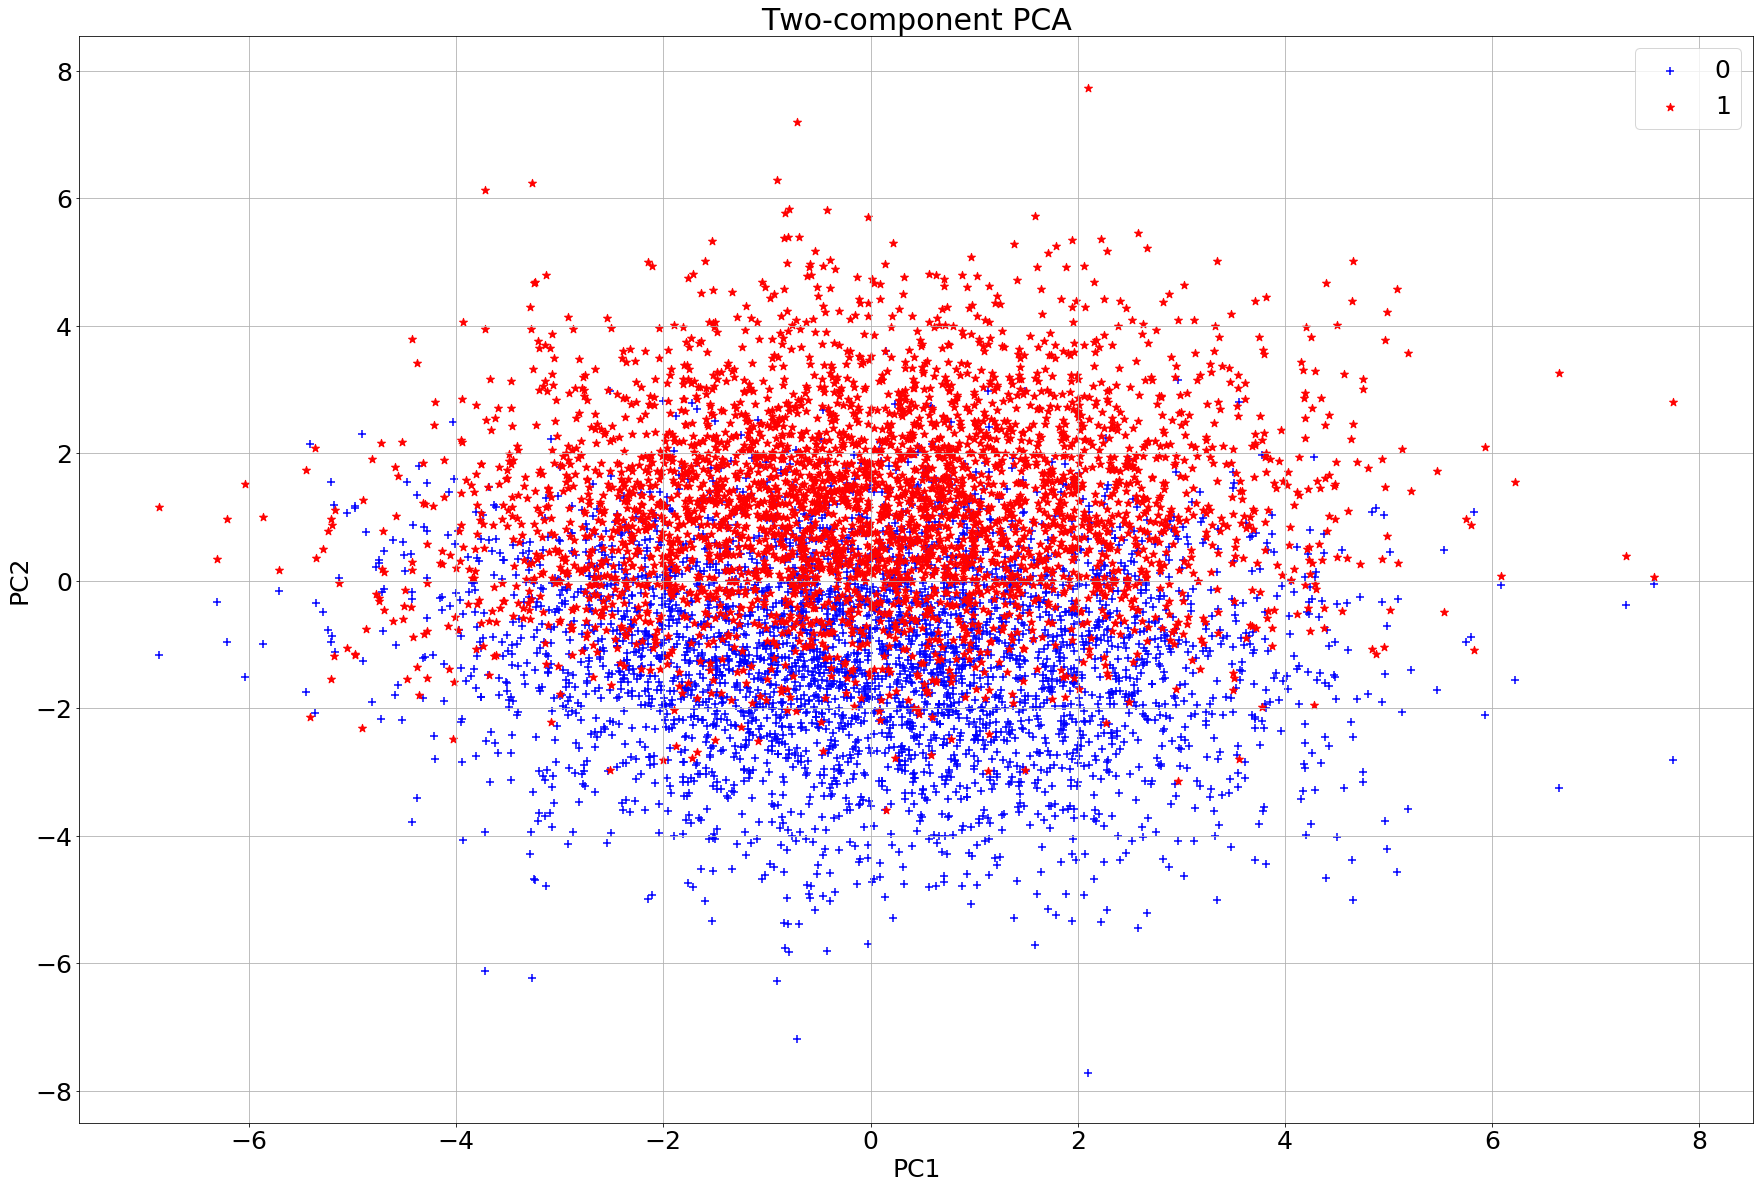

In [13]:
plt.figure(figsize=(30, 20))
matplotlib.rcParams.update({'font.size': 25})
labels = [0, 1]
colors = ['b', 'r']
markers = ['+', '*']
for label, c, m in zip(labels, colors, markers):
    indicesToKeep = Y['Label'] == label
    print('Number of label', label, '=', list(indicesToKeep).count(label))
    plt.scatter(X_PCA.loc[indicesToKeep, 'PCA_1'], X_PCA.loc[indicesToKeep, 'PCA_2'], color=c, marker=m, s=70)
plt.grid(True)
plt.legend(labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Two-component PCA')
plt.show()